In [1]:
import pandas as pd 
import os #for reading files
import matplotlib.pyplot as plt 
import sklearn
# !pip3 install seaborn
!pip3 install scikit-surprise
import seaborn as sns
path = "./final_nus_datathon_dataset"


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# !pip3 uninstall numpy -y
#!pip3 install "numpy<2"
!pip3 install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
#!pip install pyarrow 
#^if you need to install pyarrow uncomment

In [4]:
dfs = dict()
files = os.listdir(path)

print("Naming Convention:")
for i in range(len(files)):
    _,*filename,_,_ = files[i].split("_") 
    dfs[filename[0]] = pd.read_parquet(f"{path}/{files[i]}") 
    print("dfs[\"",filename[0],"\"]", ":", files[i])
               


Naming Convention:
dfs[" policy "] : nus_policy_info_df.parquet
dfs[" client "] : nus_client_info_df.parquet
dfs[" final "] : sample_final_modelling_df.parquet
dfs[" agent "] : nus_agent_info_df.parquet


In [5]:
#e.g:
dfs["policy"]

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,PID:22084,AIN:6527,CIN:15419,2012-10-30,4574.4,prod_4,1,0,1,0,0,0,1,PG:1,AG09_55to59,TNR4_4to8yr
29499,PID:13706,AIN:3472,CIN:17337,2008-09-01,267.0,prod_6,1,0,1,0,0,0,1,PG:0,AG06_40to44,TNR2_lt1yr
29500,PID:25287,AIN:7852,CIN:13015,2000-06-21,0.0,prod_4,1,0,0,1,0,0,1,PG:1,AG08_50to54,TNR5_8yrup
29501,PID:26334,AIN:8316,CIN:2239,2010-06-10,1152.0,prod_8,1,0,1,0,0,0,1,PG:0,AG03_25to29,TNR4_4to8yr


In [6]:
#removing NAs
for name in dfs:
    rows_before = len(dfs[name])
    dfs[name] = dfs[name].dropna() 
    rows_after = len(dfs[name])
    print(f"Dataset '{name}': Before {rows_before} After {rows_after}")

print("complete")

Dataset 'policy': Before 29503 After 29503
Dataset 'client': Before 20000 After 19647
Dataset 'final': Before 29503 After 29477
Dataset 'agent': Before 10129 After 10117
complete


In [7]:
#innerjoin on dataset
df_merged = pd.merge(dfs['policy'], dfs['client'], on='secuityno', how='inner')

df_merged = pd.merge(df_merged, dfs['agent'], on='agntnum', how='inner')

print(f"Final merged dataset shape: {df_merged.shape}")
print(df_merged.head())

Final merged dataset shape: (28970, 60)
    chdrnum agntnum  secuityno    occdate  annual_premium product  flg_main  \
0   PID:281  AIN:62   CIN:6957 2018-11-12             0.0  prod_8         1   
1   PID:280  AIN:63   CIN:2161 2024-02-22             7.0  prod_8         1   
2  PID:2577  AIN:63  CIN:16605 2024-08-28           423.0  prod_6         1   
3  PID:2578  AIN:63  CIN:16605 2024-08-27           217.0  prod_6         1   
4   PID:305  AIN:63   CIN:7917 2024-08-28           432.0  prod_6         1   

   flg_rider  flg_inforce  flg_lapsed  ...  pct_AG03_25to29  pct_AG04_30to34  \
0          0            1           0  ...         0.106383         0.148936   
1          0            1           0  ...         0.050439         0.260307   
2          0            1           0  ...         0.050439         0.260307   
3          0            1           0  ...         0.050439         0.260307   
4          0            1           0  ...         0.050439         0.260307   

   p

Summary Statistics:
                          occdate  annual_premium  flg_main  flg_rider  \
count                       28970     28970.00000   28970.0    28970.0   
mean   2020-10-03 19:16:34.380393      1073.05129       1.0        0.0   
min           1993-10-01 00:00:00         0.00000       1.0        0.0   
25%           2017-08-15 00:00:00         0.00000       1.0        0.0   
50%           2022-08-23 00:00:00       121.00000       1.0        0.0   
75%           2024-04-15 00:00:00       525.00000       1.0        0.0   
max           2024-11-28 00:00:00    300039.60000       1.0        0.0   
std                           NaN      4380.41527       0.0        0.0   

        flg_inforce    flg_lapsed  flg_cancel    flg_expire  flg_converted  \
count  28970.000000  28970.000000     28970.0  28970.000000        28970.0   
mean       0.764757      0.218088         0.0      0.017156            1.0   
min        0.000000      0.000000         0.0      0.000000            1.0   
2

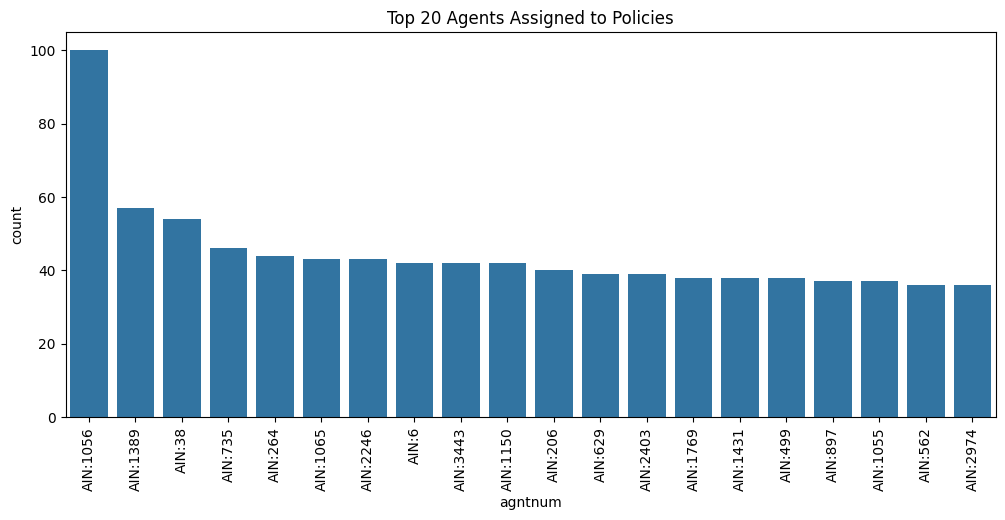

Agent Distribution:
agntnum
AIN:1056    100
AIN:1389     57
AIN:38       54
AIN:735      46
AIN:264      44
AIN:1065     43
AIN:2246     43
AIN:6        42
AIN:3443     42
AIN:1150     42
Name: count, dtype: int64


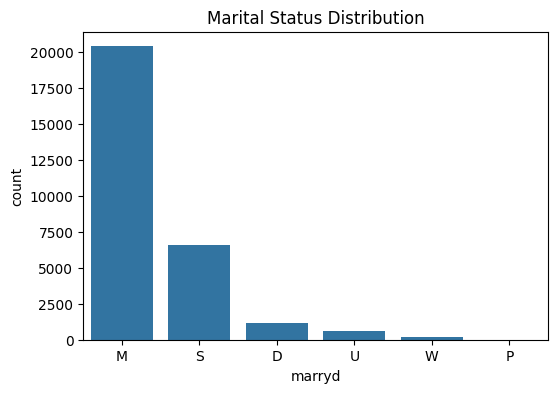

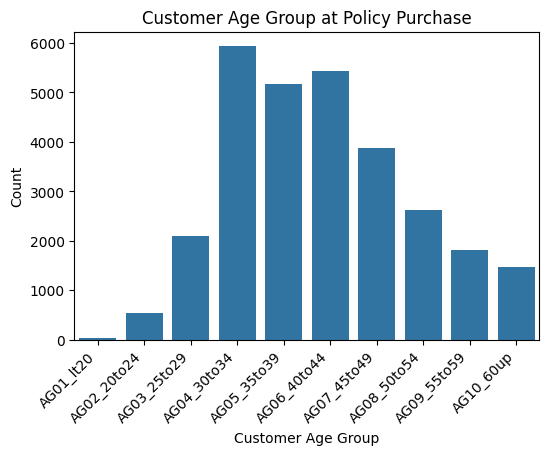

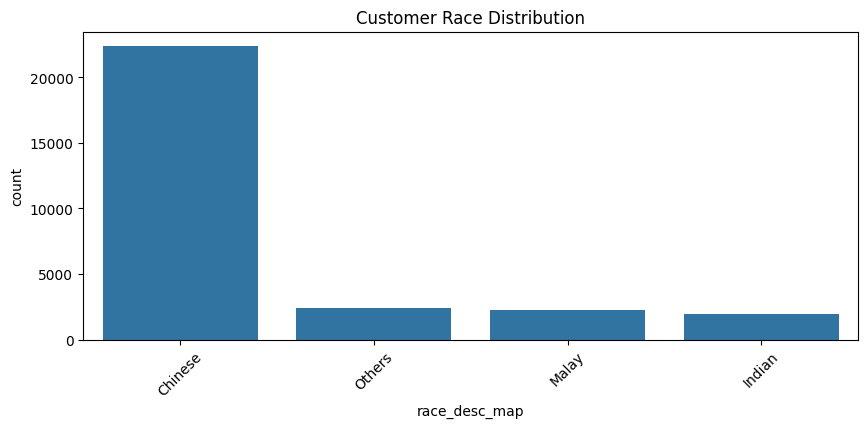

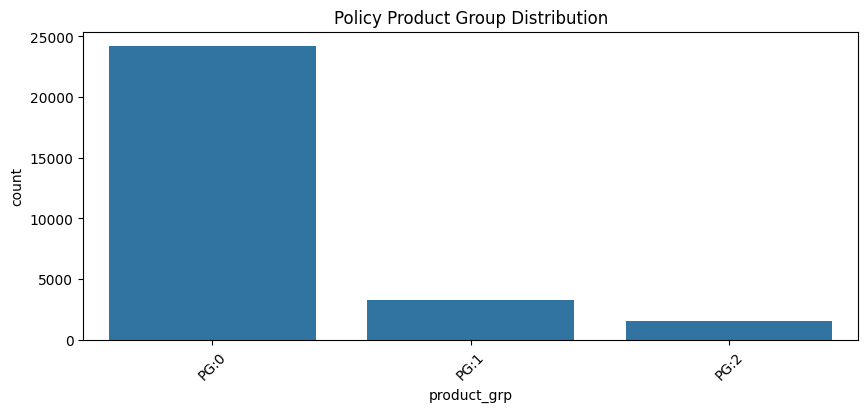

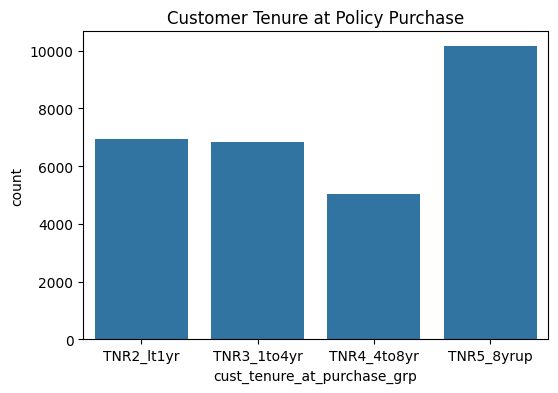

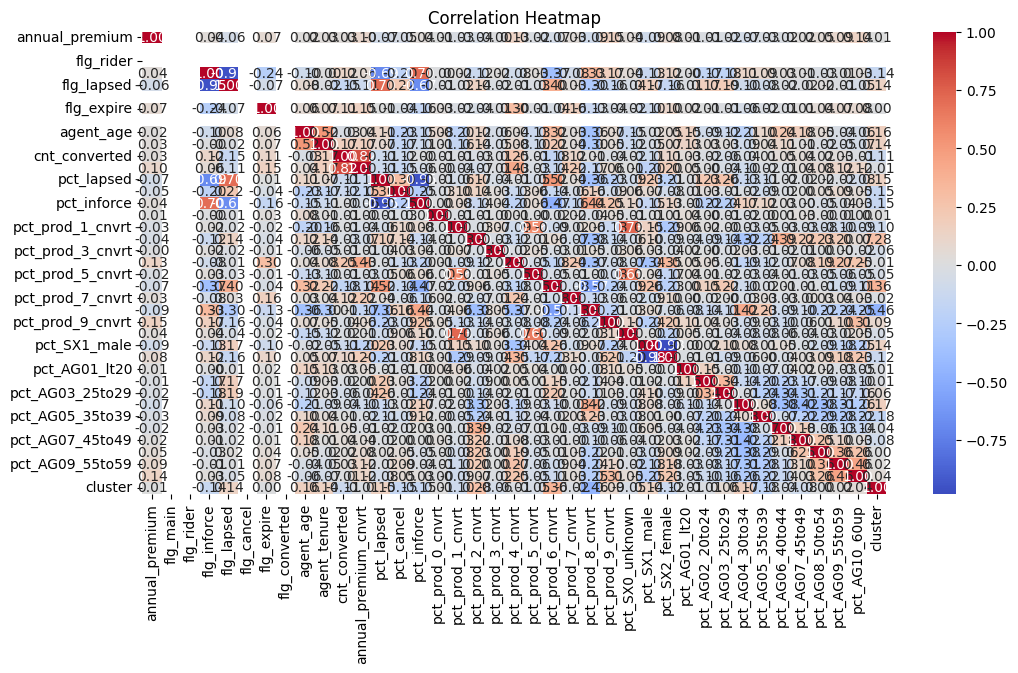

EDA Completed


In [8]:
#EDA
### Basic Dataset Overview
# print("Dataset Shape:", df_merged.shape)
# print("Column Data Types:")
# print(df_merged.dtypes)

### Summary Statistics for Numerical Columns
print("Summary Statistics:")
print(df_merged.describe())

### Target Variable Analysis (`agntnum` - Financial Advisor)
plt.figure(figsize=(12, 5))
sns.countplot(data=df_merged, x='agntnum', order=df_merged['agntnum'].value_counts().index[:20])  # Top 20 agents
plt.xticks(rotation=90)
plt.title("Top 20 Agents Assigned to Policies")
plt.show()

print("Agent Distribution:")
print(df_merged['agntnum'].value_counts().head(10))  # Print top 10 agents assigned

### Customer Demographics Analysis
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='marryd')
plt.title("Marital Status Distribution")
plt.show()

# Age group distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='cust_age_at_purchase_grp', order=sorted(df_merged['cust_age_at_purchase_grp'].unique()))
plt.xticks(rotation=45, ha="right") 
plt.title("Customer Age Group at Policy Purchase")
plt.xlabel("Customer Age Group")
plt.ylabel("Count")

# Show plot
plt.show()

# Race distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df_merged, x='race_desc_map', order=df_merged['race_desc_map'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Race Distribution")
plt.show()

### Policy Data Analysis
# Product group distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df_merged, x='product_grp', order=df_merged['product_grp'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Policy Product Group Distribution")
plt.show()

# Customer tenure at policy purchase
plt.figure(figsize=(6, 4))
sns.countplot(data=df_merged, x='cust_tenure_at_purchase_grp', order=sorted(df_merged['cust_tenure_at_purchase_grp'].unique()))
plt.title("Customer Tenure at Policy Purchase")
plt.show()

### Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("EDA Completed")

In [9]:
df_merged["cluster"].head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    7
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
25    8
26    8
27    8
28    8
29    8
30    5
31    5
32    5
33    5
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    7
42    7
43    8
44    8
45    8
46    1
47    8
48    8
49    8
Name: cluster, dtype: int32

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df_final = df_merged.drop(columns=["chdrnum", "secuityno", "cluster"])

# Convert date columns into numerical values
df_final["occdate"] = pd.to_datetime(df_final["occdate"])
df_final["policy_tenure"] = 2025 - df_final["occdate"].dt.year  # Convert policy inception year

df_final["cltdob"] = pd.to_datetime(df_final["cltdob"])
df_final["cust_age"] = 2025 - df_final["cltdob"].dt.year  # Convert birth year to age

# Drop original date columns after transformation
df_final = df_final.drop(columns=["occdate", "cltdob"])

# Define target variable (y) and feature variables (X)
y = df_final["agntnum"]  # Target: Agent ID
X = df_final.drop(columns=["agntnum"])  # Features

# Encode categorical variables
categorical_cols = [
    "agent_gender", "agent_marital", "product", "product_grp",
    "cust_age_at_purchase_grp", "cust_tenure_at_purchase_grp", "cltsex",
    "marryd", "race_desc_map", "household_size_grp", "family_size_grp"
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoders for future use

# Scale numerical features
scaler = StandardScaler()
numerical_cols = [
    "agent_age", "agent_tenure", "cnt_converted", "annual_premium_cnvrt",
    "pct_lapsed", "pct_cancel", "pct_inforce", "annual_premium",
    "policy_tenure", "cust_age"
]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display sample rows
print("\nX_train sample:")
print(X_train.head())

print("\ny_train sample:")
print(y_train.head())


X_train shape: (23176, 56)
X_test shape: (5794, 56)
y_train shape: (23176,)
y_test shape: (5794,)

X_train sample:
       annual_premium  product  flg_main  flg_rider  flg_inforce  flg_lapsed  \
7125        -0.239263        5         1          0            1           0   
21687        0.211616        2         1          0            1           0   
3732        -0.147945        3         1          0            0           1   
6379        -0.214835        3         1          0            1           0   
11326        0.173947        5         1          0            1           0   

       flg_cancel  flg_expire  flg_converted  product_grp  ...  \
7125            0           0              1            0  ...   
21687           0           0              1            1  ...   
3732            0           0              1            0  ...   
6379            0           0              1            0  ...   
11326           0           0              1            0  ...   

       

In [11]:
df_merged["cust_age_at_purchase_grp"].head(10)

0    AG05_35to39
1    AG04_30to34
2    AG08_50to54
3    AG08_50to54
4    AG07_45to49
5    AG07_45to49
6    AG09_55to59
7    AG08_50to54
8    AG08_50to54
9    AG08_50to54
Name: cust_age_at_purchase_grp, dtype: object

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, accuracy


reader = Reader(rating_scale=(0, 1))  # Binary interaction (1 = active policy, 0 = inactive)


data = Dataset.load_from_df(df_merged[['secuityno', 'agntnum', 'flg_inforce']], reader)

trainset = data.build_full_trainset() 
testset = trainset.build_testset() 


model = SVD(n_factors=100, n_epochs=20, random_state=42) 
model.fit(trainset)


predictions = model.test(testset)


rmse_score = accuracy.rmse(predictions)
mae_score = accuracy.mae(predictions)


print(f"\nFinal Model Evaluation:\n RMSE: {rmse_score:.4f}\n MAE: {mae_score:.4f}")


RMSE: 0.2494
MAE:  0.1848

Final Model Evaluation:
 RMSE: 0.2494
 MAE: 0.1848


In [13]:
from surprise import accuracy
from sklearn.metrics import r2_score

# Get actual and predicted values
y_true = [pred.r_ui for pred in predictions]  # Actual ratings
y_pred = [pred.est for pred in predictions]   # Predicted ratings

# Compute R² Score
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.6542
